In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 자주 나타나는 단어 만개만 사용

17465344/17464789 [==============================] - 154s 9us/step


In [4]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 6s 4us/step


In [6]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
import numpy as np

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension) 이고 모든 원소가 0
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

레이블 벡터로 변환

In [16]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

모델 정의

In [18]:
from keras import models
from keras.layers import Dense
model = models.Sequential()
model.add(Dense(16,activation='relu', input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), #옵티마이저
             loss='binary_crossentropy', # 손실함수
             metrics = ['accuracy'])

훈련 검증

In [22]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

모델 훈련

In [23]:
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 338us/step - loss: 0.5286 - accuracy: 0.7853 - val_loss: 0.4127 - val_accuracy: 0.8560
Epoch 2/20
15000/15000 [==============================] - 4s 281us/step - loss: 0.3229 - accuracy: 0.9021 - val_loss: 0.3279 - val_accuracy: 0.8754
Epoch 3/20
15000/15000 [==============================] - 4s 285us/step - loss: 0.2408 - accuracy: 0.9231 - val_loss: 0.2924 - val_accuracy: 0.8858
Epoch 4/20
15000/15000 [==============================] - 4s 295us/step - loss: 0.1875 - accuracy: 0.9411 - val_loss: 0.2761 - val_accuracy: 0.8892
Epoch 5/20
15000/15000 [==============================] - 5s 321us/step - loss: 0.1571 - accuracy: 0.9512 - val_loss: 0.2844 - val_accuracy: 0.8857
Epoch 6/20
15000/15000 [==============================] - 4s 292us/step - loss: 0.1285 - accuracy: 0.9618 - val_loss: 0.2909 - val_accuracy: 0.8854
Epoch 7/20
15000/15000 [==============================] - 4s 2

In [25]:
history_dic = history.history
history_dic.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

훈련과 검증 손실 그리기

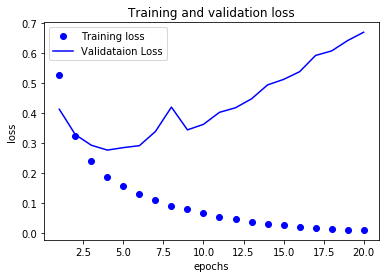

In [26]:
import matplotlib.pyplot as plt
loss = history_dic['loss']
val_loss = history_dic['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # bo는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validataion Loss') # b는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

훈련과 검증 정확도 그리기

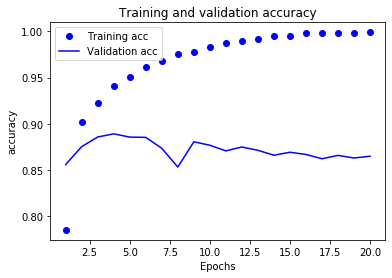

In [27]:
plt.clf() # 그래프 초기화
acc = history_dic['accuracy']
val_acc = history_dic['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

epochs 4에서 과적합 발생으로 모델 재생성

In [29]:
model = models.Sequential()
model.add(Dense(16,activation='relu', input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.4602 - accuracy: 0.8198
Epoch 2/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.2620 - accuracy: 0.9108
Epoch 3/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2009 - accuracy: 0.9279
Epoch 4/4
25000/25000 [==============================] - 3s 133us/step


In [30]:
results

[0.2990472491836548, 0.8823599815368652]

훈련된 모델로 새로운 데이터에 대해 예측하기

In [31]:
model.predict(x_test)

array([[0.17441858],
       [0.9998574 ],
       [0.8733211 ],
       ...,
       [0.11419006],
       [0.06282523],
       [0.49695933]], dtype=float32)